In [1]:
import pandas as pd

### Finding the number of crimes reported for each week

#### it can be done by groupbing the data on weekly time

In [2]:
crime = pd.read_hdf('data/crime.h5')

#### the respample method which we need to use works on dataframe which has Time as Index

In [3]:
type(crime.index)

pandas.core.indexes.numeric.Int64Index

In [4]:
crime = crime.set_index('REPORTED_DATE')

In [5]:
crime_sort = crime.sort_index()

In [6]:
type(crime_sort.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
sampled_weekly = crime_sort.resample('W')

In [8]:
print(sampled_weekly)

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [9]:
weekly_crimes = sampled_weekly.size()

In [10]:
weekly_crimes.head(10)  # index is already sorted, so get sorted based on the time

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
2012-02-12    1013
2012-02-19     982
2012-02-26     974
2012-03-04     921
2012-03-11     929
Freq: W-SUN, dtype: int64

#### verifying with original data

In [11]:
len(crime_sort.loc[: '2012-01-08'])  # crime upto Jan 8th 2012

877

In [12]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])  # jan 9th - 15th (next week)

1071

In [13]:
weekly_sample_ending_thu = crime_sort.resample('W-THU').size()

In [14]:
weekly_sample_ending_thu.head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [15]:
len(crime_sort.loc[: '2012-01-05'])  # crime upto Jan 5th 2012

462

#### getting the same with groupby method of the data frame.

In [16]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()

In [17]:
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

#### using resample method, when the df dont have TimeStamp as indexx

In [18]:
crime = pd.read_hdf('data/crime.h5')

In [19]:
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()

In [20]:
weekly_crimes2.equals(weekly_crimes)

True

In [21]:
weekly_crimes_gby_2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()

In [22]:
weekly_crimes_gby_2.equals(weekly_crimes_gby)

True

In [23]:
weekly_crimes_gby_2.equals(weekly_crimes2)

True

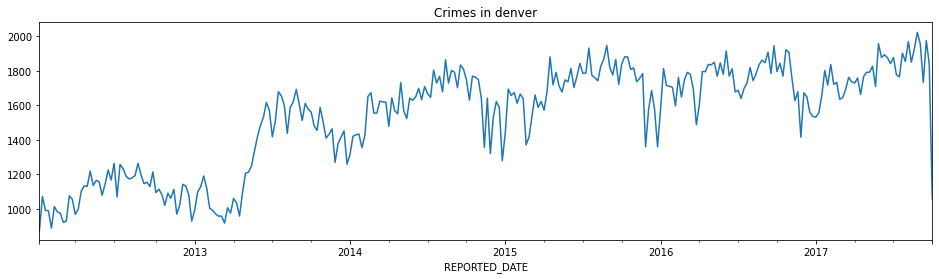

In [24]:
plot = weekly_crimes.plot(figsize=(16, 4), title='Crimes in denver')